<h1><b>UNICEF Take-Home Assignment</b></h1>

----

## Project Objective

<b>Scenario:</b>
<p>
UNICEF USA has recently launched a <u>digital marketing campaign</u> <u>aimed</u> at <u><b><i>increasing</i></b></u> <u>engagement</u> and <u>donations</u> from new and existing constituents. Your task is to analyze the campaign data, generate insights, and provide recommendations for future campaigns.</p>

<br>

<b>Tasks:</b>

1. <b><i>Data Analysis & Visualization</b></i>
- Analyze the provided campaign performance data to identify key trends and patterns.
- Create visualizations to effectively communicate your findings. Use any data visualization tool you are
comfortable with (e.g., PowerBI, Tableau, LookerStudio).

2. <b><i>Performance Evaluation</b></i>
- Evaluate the effectiveness of the campaign across different channels (paid, owned, and earned).
- Identify which audience segments were most responsive to the campaign.

3. <b><i>Insights & Recommendations</b></i>
- Based on your analysis, provide actionable insights that can help optimize future marketing campaigns.
- Suggest strategies for improving engagement and donation rates from new and existing constituents.

4. <b><i>Data Storytelling</b></i>
- Prepare a short presentation (5-7 slides) summarizing your analysis, key insights, and
recommendations.
- Ensure your presentation is clear, concise, and tailored for a non-technical audience.


<br>

<b>Dummy Data provided:</b>

1. <b><i>Campaign Performance Data</b></i> (campaign_performance_data): 
- - Includes metrics from paid, owned, and earned channels (e.g., impressions, clicks, conversions, engagement rates).
<br>
2. <b><i>Audience Segmentation Data</b></i> (audience_segmentation_data): 
- - Details about different audience segments targeted in the campaign (e.g., demographics, past engagement).

<br>

----
<p>This assignment aims to assess your ability in the following areas:</p>

1. <b><u>Data Analysis</b></u>: Accuracy and depth of your analysis.
2. <b><u>Visualization</b></u>: Clarity and effectiveness of your visualizations.
3. <b><u>Insights Development</b></u>: Relevance and actionability of your insights and recommendations.
4. <b><u>Communication</b></u>: Clarity and conciseness of your presentation and written explanations.

<p>
Please share your work via email as a PDF document or a shared link to an online presentation (e.g., Google Slides)
along with any supporting data files (e.g., Excel, CSV).</p>

----

In [1]:
# importing necessary packages to run code in this notebook

import pandas as pd
import matplotlib.pyplot as plt

---

<h2>/audience_segmentation_data.csv</h2>

> - read and clean dataset

In [2]:
# read /audience_segmentation_data.csv file and storing it to the variable 'aud_seg' for the DataFrame


try:
    aud_seg = pd.read_csv('audience_segmentation_data.csv', sep=',') 
    print('The right path is audience_segmentation_data.csv')
except:
    aud_seg = pd.read_csv('/datasets/audience_segmentation_data.csv', sep=',') 
    print('The right path is /datasets/audience_segmentation_data.csv')

display(aud_seg)

The right path is audience_segmentation_data.csv


,Segment,Age_Group,Gender,Engagement_Level,Past_Engagement
0,New Donors,18-24,Male,Low,12
1,Existing Donors,25-34,Female,Medium,39
2,Potential Donors,35-44,Other,High,12
3,New Donors,45-54,Male,High,36
4,Existing Donors,55-64,Female,High,18
5,Potential Donors,65+,Other,Medium,23
6,New Donors,18-24,Male,Medium,26
7,Existing Donors,25-34,Female,High,28
8,Potential Donors,35-44,Other,Medium,30
9,New Donors,45-54,Male,Low,44


In [3]:
# obtain general information about data in audience_segmentation_data DataFrame (dtype of columns, non-null values, and memory usage)

aud_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Segment           30 non-null     object
 1   Age_Group         30 non-null     object
 2   Gender            30 non-null     object
 3   Engagement_Level  30 non-null     object
 4   Past_Engagement   30 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.3+ KB


aud_seg.info() notes:
> - all columns are objects expect for 'Past_Engagement'
> - there seems to be no missing values in any columns based on an overview for count of rows
> - column header is a combination of CamelCase and snake_case, renaming convention to snake_case for standard format

In [4]:
# rename column names to standardize format

aud_seg.rename(columns={'Segment': 'segment',
                        'Age_Group': 'age_group',
                        'Gender': 'gender',
                        'Engagement_Level': 'engagement_level',
                        'Past_Engagement': 'past_engagement'
                        }, inplace=True)


# display dataframe to see column name changes
display(aud_seg.head())

,segment,age_group,gender,engagement_level,past_engagement
0,New Donors,18-24,Male,Low,12
1,Existing Donors,25-34,Female,Medium,39
2,Potential Donors,35-44,Other,High,12
3,New Donors,45-54,Male,High,36
4,Existing Donors,55-64,Female,High,18


In [5]:
# validate there are no missing values in aud_seg dataset

print((aud_seg).isna().sum())

segment             0
age_group           0
gender              0
engagement_level    0
past_engagement     0
dtype: int64


> - no missing values in aud_seg confirmed

In [6]:
# identify if there are any duplicate values in aud_seg dataset

print(aud_seg.duplicated())
print()
print(f"total duplicate values: {aud_seg.duplicated().sum()}")

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

total duplicate values: 0


> - no duplicate values in aud_seg confirmed

-----

<h2>/campaign_performance_data.csv</h2>

> - read and clean dataset

In [7]:
# read /campaign_performance_data.csv file and storing it to the variable 'cam_perf' for the DataFrame

try:
    cam_perf = pd.read_csv('campaign_performance_data.csv', sep=',') 
    print('The right path is campaign_performance_data.csv')
except: 
    cam_perf = pd.read_csv('/datasets/campaign_performance_data', sep=',')
    print('The right path is /datasets/campaign_performance_data')

display(cam_perf)

The right path is campaign_performance_data.csv


,Channel,Impressions,Clicks,Conversions,Engagement_Rate
0,Paid,5508,652,13,0.07
1,Owned,5173,543,41,0.20
2,Earned,2401,858,38,0.11
3,Paid,6285,586,46,0.06
4,Owned,7732,875,82,0.17
5,Earned,5101,836,35,0.16
6,Paid,3654,938,38,0.06
7,Owned,2450,960,90,0.08
8,Earned,2476,668,64,0.12
9,Paid,4882,151,72,0.18


In [8]:
# obtain general information about data in campaign_performance_data DataFrame (dtype of columns, non-null values, and memory usage)

cam_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Channel          30 non-null     object 
 1   Impressions      30 non-null     int64  
 2   Clicks           30 non-null     int64  
 3   Conversions      30 non-null     int64  
 4   Engagement_Rate  30 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.3+ KB


cam_perf.info() notes: 

> - 'Channel' is the only object in dataframe
> - 'Engagement_Rate' is a float dtype
> - there seems to be no missing values in any columns based on an overview for count of rows
> - column header is a combination of CamelCase and snake_case, renaming convention to snake_case for standard format
> - there seems to be no common columns between both dataframes

In [9]:
# rename column names to standardize format 

cam_perf.rename(columns={'Channel': 'channel',
                        'Impresions': 'impressions',
                        'Clicks': 'clicks',
                        'Conversions': 'conversions',
                        'Engagement_Rate': 'engagement_rate'
                        }, inplace=True)


# display dataframe to see column name changes
display(cam_perf.head())

,channel,Impressions,clicks,conversions,engagement_rate
0,Paid,5508,652,13,0.07
1,Owned,5173,543,41,0.20
2,Earned,2401,858,38,0.11
3,Paid,6285,586,46,0.06
4,Owned,7732,875,82,0.17


In [10]:
# validate there are no missing values in cam_perf dataset

print((cam_perf).isna().sum())

channel            0
Impressions        0
clicks             0
conversions        0
engagement_rate    0
dtype: int64


> - no missing values in cam_perf confirmed

In [11]:
# identify if there are any duplicate values in cam_perf dataset

print(cam_perf.duplicated())
print()
print(f"total duplicate values: {cam_perf.duplicated().sum()}")

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

total duplicate values: 0


> - no duplicate values in cam_perf confirmed

----

In [12]:
# viewing clean dataframes

print('audience_segmentation_data.csv:')
display(aud_seg)

print('campaign_performance_data.csv:')
display(cam_perf)

audience_segmentation_data.csv:


,segment,age_group,gender,engagement_level,past_engagement
0,New Donors,18-24,Male,Low,12
1,Existing Donors,25-34,Female,Medium,39
2,Potential Donors,35-44,Other,High,12
3,New Donors,45-54,Male,High,36
4,Existing Donors,55-64,Female,High,18
5,Potential Donors,65+,Other,Medium,23
6,New Donors,18-24,Male,Medium,26
7,Existing Donors,25-34,Female,High,28
8,Potential Donors,35-44,Other,Medium,30
9,New Donors,45-54,Male,Low,44


campaign_performance_data.csv:


,channel,Impressions,clicks,conversions,engagement_rate
0,Paid,5508,652,13,0.07
1,Owned,5173,543,41,0.20
2,Earned,2401,858,38,0.11
3,Paid,6285,586,46,0.06
4,Owned,7732,875,82,0.17
5,Earned,5101,836,35,0.16
6,Paid,3654,938,38,0.06
7,Owned,2450,960,90,0.08
8,Earned,2476,668,64,0.12
9,Paid,4882,151,72,0.18


----

<h2>Analyzing 'campaign_performance_data' To Identify Key Trends and Patterns.</h2>

In [23]:
# No data dictionary provided for dataset
# Researching information instead of making assumptions. 


# What is paid, owned, earned channels? 
#  - Paid, owned, and earned media are three types of marketing channels that can be used to promote a company or brand.
#  - These marketing channel strategies can help you reach your overarching marketing goals, boost revenue, and increase ROI.
#  - But, how can you use these channels to increase sales, drive growth, and build a good reputation?

# Paid = media a company PAYS to promote its content on external platforms (such as: social media, search engines, websites, televsion ads).
# Paid media can offer control and immediate results, but it won't be effective without strong owned media.

# Owned = media a company CREATES and CONTROLS through its own digital content (such as: it's own website, blog, email ads). 
# Owned media can be valuable, but it won't gain traction without other distribution channels.

# Earned = media OTHERS CREATE content about/for a company (such as: reviews, news stories, social media mentions, or media coverage). 
# Earned media can bring turst, authenticity, and credibility, but it can be challenging to control and scale because it's not created by the company.
# Generating earned media often requires strategic PR, influencer partnerships, and engaging with customers.

#source: https://mailchimp.com/resources/earned-media-vs-paid-media/?igaag=154664726859&igaat=&igacm=20637339549&igacr=687230856184&igakw=&igamt=&igant=g&ds_c=DEPT_AOC_Google_Search_US_EN_NB_Acquire_Broad_DSA-Rsrc_US&ds_kids=p78250621731&ds_a_lid=dsa-2227026702184&ds_cid=71700000115207178&ds_agid=58700008574686663&gad_source=1&gclid=Cj0KCQjwwae1BhC_ARIsAK4JfrwOYgWVPasyEnOl6rrYGAo8jmtqwYxYKdkcIiLVjPfHPqRw3CLw0YkaAnEvEALw_wcB&gclsrc=aw.ds

In [30]:
# No data dictionary provided for dataset
# Researching information instead of making assumptions. 


# What are impressions? 
#  - When a user sees an advertisement, not to be confused with engagement. 
#  - Impression = exposure to ad
#  - Impressions are important because they provide a simple representation of how many people are seeing ads within a particular channel.
#  - Calculating the number of impressions a campaign generates is also one of the simplest ways to ascertain how far an advertising channel really reaches.
#source: https://www.adjust.com/glossary/impression/


# What are clicks? 
#  - A metric that counts how often a user interacts with an advertisement to be taken to a specific site for a specific reason.
#  - Clicks are one of the most effective and accurate methods because an individual clicking on an advertisement indicates expressed interest. 
#  - Each metric helps marketers gauge how well their advertising works and what audiences respond to specific advertisements.
#source: https://www.klipfolio.com/resources/kpi-examples/digital-marketing/ad-clicks-vs-ad-impressions


# What are conversions? 
#  - When a user performs a desired action in response to a call-to-action (CTA) placed in an ad.
#  - A conversion, also known as a conversion event, could be a download, install, sign-up, or purchase, among other actions for example.
#  - Marketers measure their conversions to assess the performance of a campaign or advertising channel or the impact of a change to the user experience.
#source: https://www.adjust.com/glossary/conversion/


# What is an engagement rate and how is it calculated? 
#  - A measure of how many people interact with specific content.
#  - Engagement Rate is not just a number; it's a reflection of the audience's connection to a brand.
#  - Calculated by dividing the total number of engagements by the total number of followers, and then multiplying by 100%. (Engagement Rate = Total Engagement / Total Followers x 100%)
#  - Total engagement is the sum of all interactions & Total followers is the number of people who follow the account. 
#source: https://agencyanalytics.com/kpi-definitions/engagement-rate


In [13]:
# What is the total metric of each category in 'channel'? 


# Counting the total number of each channel type
channel_counts = cam_perf['channel'].value_counts()
print(channel_counts)

channel
Paid      10
Owned     10
Earned    10
Name: count, dtype: int64


channel
Earned    54615
Owned     56898
Paid      58221
Name: Impressions, dtype: int64


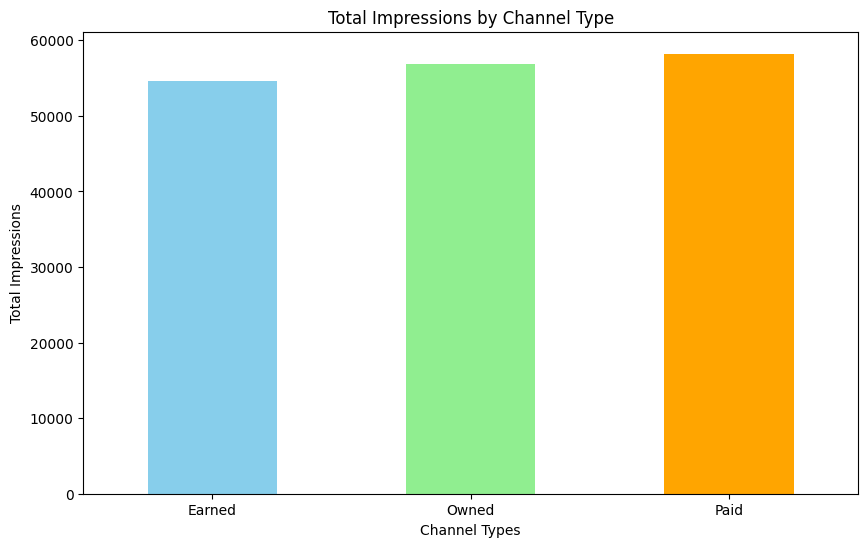

In [28]:
# What is the total metric of 'impressions' in each channel type?


# Finding total number of impressions in each channel type
impression_totals = cam_perf.groupby('channel')['Impressions'].sum()
print(impression_totals)


# Plot
plt.figure(figsize=(10, 6))
impression_totals.plot(kind='bar', color=['skyblue', 'lightgreen', 'orange'])
plt.title('Total Impressions by Channel Type')
plt.xlabel('Channel Types')
plt.xticks(rotation=0)
plt.ylabel('Total Impressions')

plt.show()


> - Paid generates the most impressions, followed by Owned. 
> - Earned has the least amount of impressions, comparatively. 

In [33]:
print('test')

test


In [32]:
# When looking at impressions vs. clicks, it is important to remember that while each tells an advertiser different things, both work in tandem.
# Impressions help get a product greater exposure to a larger market; clicks measure how well that engagement converts to active interaction.


# KPIs associated with conversion are key to assessing the effectiveness of marketing campaigns.
# You can only determine your return on ad spend (ROAS) if you measure how many users convert as a cause of that spend. 
# Conversion rate is particularly important when running mobile user acquisition campaigns because it can measure the success of each campaign. 
# It can also be used to set return on investment (ROI) expectations when scaling a campaign.

# Engagement Rate is a pivotal KPI that acts as both a standalone metric and a linchpin that connects with other key performance indicators.  
# For example, a higher Engagement Rate often leads to more Clicks and Conversions, as engaged users are more likely to follow through with desired actions
# Engagement Rate plays a role in the financial aspect of advertising campaigns. A higher Engagement Rate can result in lower Customer Acquisition Costs (CAC), which improves ROI.
# However, If engagement is high but conversions are low, it may signal that while the content is compelling, it's not effectively moving users through the sales funnel or the content is resonating with the wrong audience


In [25]:
# what results produce the highest conversion? 
# is there a correlation between engaement_rate and conversion? 
# is there a correlation between other factors? 

# focus on how many people were exposed to an advertisement and how many converted to clicks versus the cost of the advertising

In [15]:
display(cam_perf)

,channel,Impressions,clicks,conversions,engagement_rate
0,Paid,5508,652,13,0.07
1,Owned,5173,543,41,0.20
2,Earned,2401,858,38,0.11
3,Paid,6285,586,46,0.06
4,Owned,7732,875,82,0.17
5,Earned,5101,836,35,0.16
6,Paid,3654,938,38,0.06
7,Owned,2450,960,90,0.08
8,Earned,2476,668,64,0.12
9,Paid,4882,151,72,0.18
